
# ResNet-Competition

__Author:
Viktor Karlsson [viktor2karlsson@gmail.com](mailto:viktor2karlsson@gmail.com)__

In [112]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from keras.models import Model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal
from keras.regularizers import l1, l2
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# load (downloaded if needed) the MNIST dataset
(X_train_all, Y_train_all), (X_test, Y_test) = mnist.load_data()

# MLP

In [117]:
def create_mlp_layers(dims, activation='relu', seed=1337, input_dim=784, output_dim=10):

    layers = list()
    
    layers.append(
        Dense(dims[0], 
              input_dim=input_dim, 
              activation=activation, 
              kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=seed), 
              bias_initializer='zeros', 
              kernel_regularizer=reg(reg_param)
         )
    )
    dims = dims[1:]
    for i, dim in enumerate(dims):
        layers.append(
            Dense(dim,
                  activation=activation, 
                  kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=seed+i), 
                  bias_initializer='zeros', 
                  kernel_regularizer=reg(reg_param)
                 )
        )
    #end for
    
    layers.append(
        Dense(output_dim, 
              activation='softmax', 
              kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=seed), 
              bias_initializer='zeros', 
              kernel_regularizer=reg(reg_param)
         )
    )
    
    return layers

In [114]:
print(f'Shape of X_train is: {X_train_all.shape}')
print(f'Shape of Y_train is: {Y_train_all.shape}\n')

print('Reshaping training data into vector...')
X_train_all = X_train_all.reshape(X_train_all.shape[0], np.prod(X_train_all.shape[1:]))
print(f'Shape of X_train is now: {X_train_all.shape}\n')

print('Transforming training labels into one-hot encodings...')
Y_train_all = to_categorical(Y_train_all)
print(f'Shape of Y_train is now: {Y_train_all.shape}\n')

X_train, X_val, Y_train, Y_val = train_test_split(X_train_all, Y_train_all, test_size=0.1)
print(f'Using {len(X_train)} for training and {len(X_val)} for validation.')
print(f'Using {len(X_test)} for testing')

Shape of X_train is: (60000, 28, 28)
Shape of Y_train is: (60000,)

Reshaping training data into vector...
Shape of X_train is now: (60000, 784)

Transforming training labels into one-hot encodings...
Shape of Y_train is now: (60000, 10)

Using 54000 for training and 6000 for validation.
Using 10000 for testing


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_604 (Dense)            (None, 12)                9420      
_________________________________________________________________
dense_605 (Dense)            (None, 12)                156       
_________________________________________________________________
dense_606 (Dense)            (None, 12)                156       
_________________________________________________________________
dense_607 (Dense)            (None, 11)                143       
_________________________________________________________________
dense_608 (Dense)            (None, 10)                120       
Total params: 9,995
Trainable params: 9,995
Non-trainable params: 0
_________________________________________________________________


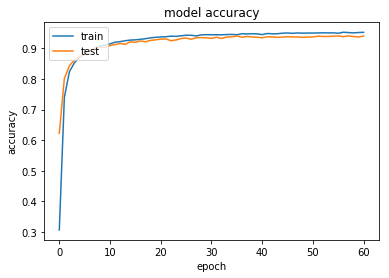

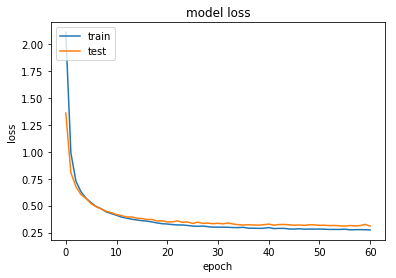

In [135]:
%matplotlib inline
input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]
seed = 1337

reg = l2
reg_param = 0.01

epochs = 100
verbose = 0



# --------------- "shallow" model ---------------
dims = [12,12,12,11]
shallow = create_mlp_layers(dims)


# --------------- deep model ---------------
dims = [11]*2+[10]*10
deep = create_mlp_layers(dims, activation='relu')

model = Sequential(shallow)

ES = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()
history = model.fit(X_train, Y_train, epochs=epochs, callbacks=[ES], batch_size=1000, validation_data=(X_val, Y_val), verbose=verbose)



# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history[f'val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ResNet
This network focuses on learning the residuals in each step through letting the input to a layer bypass the activation the identity tranfrom 